# Applied stochastics

## with applications for security and privacy

## Lecture: Risk-Limiting Audits - Part 1:

## Introduction


Materials:

* Voting and Election Audits, Philip B. Stark, [RLA website](https://www.stat.berkeley.edu/~stark/Vote/index.htm)
* A gentle introduction to risk-limiting audits, M. Lindeman, P.B. Stark, [Gentle RLA](https://www.stat.berkeley.edu/~stark/Preprints/gentle12.pdf)
* BRAVO: Ballot-polling risk-limiting audits to verify outcomes, Lindeman, Stark, Yates, [BRAVO](https://www.usenix.org/system/files/conference/evtwote12/evtwote12-final27.pdf)
* Bayesian Tabulation Audits: Explained and Extended, Ronald L. Rivest, [Bayesian audits](https://arxiv.org/pdf/1801.00528.pdf)
* Risk-Limiting Bayesian Polling Audits, Poorvi L. Vora, [RLA Bayesian](https://arxiv.org/pdf/1902.00999.pdf)



![ship](img/Harold_Shipman_mug_shot.jpg)

* detection of anomalous medical outcomes
* testing of human examinees
* manufacturing (quality testing)
* security

# Problems with voting

![example ballot](img/ballot.png)

![voting machines](img/machines.webp)

![example ballot](img/scanner.jpg)

# Problems with voting

![example ballot](img/machine-unattended.jpg)

Complicated ballots with many races:

* hard to vote $\rightarrow$ BMD, DRE, ...
* hard to tally $\rightarrow$ scanners, ...
* hard to verify/audit $\rightarrow$ ?

# Post tabulation audits

## Goal:
    
To provide assurance that the reported results are correctS

Post-election audit methods:

* Risk-limiting audit (RLA), invented by Stark
* Bayesian audits, invented by Rivest, Chen

# Risk-limiting audit

Input: risk-limit $\alpha$ (e.g., 0.05/0.10)

If a reported outcome is incorrect then this error is detected and corrected with probability at least $1-\alpha$

Correct outcomes are not altered

**Risk limit** largest possible chance of not correcting reported outcome, if reported outcome is wrong

**Wrong** means accurate handcount of trustworthy paper trail would find different winner(s)

**Trustworthy** means a full hand count would show the will of the (eligible) voters who voted.

If paper trail is not trustworthy, full hand count might show the wrong winner(s).

# RLAs as statistical hypothesis tests

**Null hypothesis** reported outcome is incorrect

**Alernative hypothesis** reported outcome is correct

**Significance level** chance of incorrectly rejecting the null hypothesis -- is the risk limit $\alpha$

Audit stops without a full manual recount only if null is rejected

# Wald's Sequential Probability Ratio Test

$H_0:\quad p = p_0$

$H_1:\quad p = p_1$

Voting scenario

$p_0 = .5$ - election was truly tied

$p_1 = x > .5$ - election was wan by the reported winner with $x$ fraction of the votes

$\alpha$ - risk limit

$\beta$ - probability of proceedint to a full hand count unnecessarily

$$\sigma_n = \frac{p_1^{k_n} (1-p_1)^{n-k_n}}{(\frac{1}{2})^n}$$

* $\sigma_n > \frac{1-\beta}{\alpha}$ - stop the audit and certify the reported outcome

* $\sigma_n < \frac{\beta}{1-\alpha}$, proceed directly to a full hand count (to determine the true outcome)

* otherwise, draw more samples

# BRAVO

$\textsf{BRAVO}(s_w, \alpha, M)$

1. $T = 1$ ($\sigma_n$); $m = 0$

2. draw a ballot $b$; $m = m + 1$

    * $b == w \rightarrow T = T \cdot \frac{s_w}{0.5}$
    * $b == l \rightarrow T = T \cdot \frac{1 - s_w}{0.5}$

3. if $T \geq \frac{1}{\alpha} \rightarrow STOP \quad OK$

4. if $m == M \rightarrow FULL \quad HAND \quad COUNT$

5. if neither (3) nor (4) holds, go back to (2)



Voting scenario

$p_0 = .5$ - election was truly tied

$p_1 = x > .5$ - election was wan by the reported winner with $x$ fraction of the votes

$\alpha$ - risk limit

$\beta$ - probability of proceedint to a full hand count unnecessarily

$$\sigma_n = \frac{p_1^{k_n} (1-p_1)^{n-k_n}}{(\frac{1}{2})^n}$$

* $\sigma_n > \frac{1-\beta}{\alpha}$ - stop the audit and certify the reported outcome

* $\sigma_n < \frac{\beta}{1-\alpha}$, proceed directly to a full hand count (to determine the true outcome)

* otherwise, draw more samples

Proof. Let $\beta = 0$. We stop when $\sigma_n \geq 1/\alpha$.

Sample size: $n$

Votes for reported winner $k_n$

$P[\text{votes for winner} k_n \text{with sample size:} n | H_0] = {n \choose k_n} p_0^{k_n} (1-p_0)^{n - k_n}$

$P[\text{votes for winner} k_n \text{with sample size:} n | H_1] = {n \choose k_n} p_1^{k_n} (1-p_1)^{n - k_n}$

we will stop when $k_n$ is such that:

$\alpha P[\text{votes for winner} k_n \text{with sample size:} n | H_1] \geq P[\text{votes for winner} k_n \text{with sample size:} n | H_0]$


$\sigma_n = \frac{P[\text{votes for winner} k_n \text{with sample size:} n | H_1]}{P[\text{votes for winner} k_n \text{with sample size:} n | H_0]} \geq 1/\alpha$

$$\sigma_n = \frac{{n \choose k_n} p_1^{k_n} (1-p_1)^{n - k_n}}{{n \choose k_n} p_0^{k_n} (1-p_0)^{n - k_n}} =$$

$$ = \frac{p_1^{k_n} (1-p_1)^{n - k_n}}{p_0^{k_n} (1-p_0)^{n - k_n}}$$

# BRAVO

In [39]:
import numpy as np

alpha = 0.05 # risk limit

winner = 5500000  # declared votes for winner
ballots_cast = 10000000 # declared ballots cast

s_w = winner/ballots_cast # declared
s_w_a = .49 #s_w # actual declared winner share

M = 1000 # full recount

In [40]:
def BRAVO(s_w, s_w_a, alpha, M):
    n = 0
    T = 1
    while T <= 1/alpha and n < M:
        n = n + 1
        b = np.random.geometric(s_w_a)
        if b == 1:
            T = T * 2 * s_w
        else:
            T = T * 2  * (1-s_w)
    return T, n

In [41]:
tests = 1000
passed = 0
for i in range(tests):
    t, n = BRAVO(s_w, s_w_a, alpha, M)
    if t > 1/alpha:
        passed = passed + 1

print("declared: ", s_w, " actual: ", s_w_a, " limit: ", M)
print("Test PASSED ", passed)
print("FULL HAND COUNT ", tests - passed)

declared:  0.55  actual:  0.49  limit:  1000
Test PASSED  14
FULL HAND COUNT  986


# BRAVO - efficiency

![BRAVO table](img/BRAVO.png)

In [47]:
s_w = .6 #(1 + .093)/2
print(s_w)
s_w_a = s_w
M = 150 #1117
tests = 10000
passed = 0
for i in range(tests):
    t, n = BRAVO(s_w, s_w_a, alpha, M)
    if t > 1/alpha:
        passed = passed + 1

print("Test PASSED ", passed)
print("FULL HAND COUNT ", tests - passed)

0.6
Test PASSED  6363
FULL HAND COUNT  3637


# Real-world auditing

Sampling is performed round-by-round not ballot-by-ballot.

Result: one observes T every $r$ sampled ballots. Decision

In [48]:
def bravo_kmin(NN, wd, alpha, n):
    kmin = np.ceil((np.log(alpha) + n * (np.log(2) + np.log(NN-wd) - np.log(NN)))/(np.log(NN-wd)-np.log(wd)))
    return np.int64(kmin)


In [50]:
bravo_kmin(1000, 600, .1, 1117)

621

In [51]:
from matplotlib import pyplot
from scipy.stats import binom

In [ ]:
def sigma(p0, p1, k, n):
    x0 = 

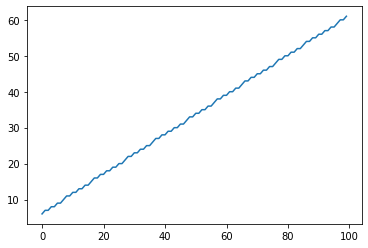

In [52]:
import math
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 100, 1)
y = bravo_kmin(1000, 600, .1, x)
plt.plot(x, y)

In [56]:
def BRAVO_hist(s_w, s_w_a, alpha, M):
    n = 0
    T = 1
    hist = []
    hist.append(0)
    v_w = 0 # votes for winner in a sample
    while T <= 1/alpha and n < M:
        n = n + 1
        b = np.random.geometric(s_w_a)
        if b == 1:
            T = T * 2 * s_w
            v_w = v_w + 1
        else:
            T = T * 2  * (1-s_w)
        hist.append(v_w)
    return T, n, hist

In [71]:
s_w = 0.6
s_w_a = 0.61
M = 150
alpha = .01

150


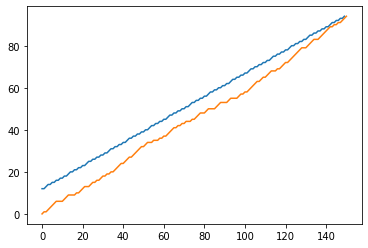

In [81]:
T, n, z = BRAVO_hist(s_w, s_w_a, alpha, M)

x = np.arange(0, M, 1)
y = bravo_kmin(10000, math.floor(s_w * 10000), alpha, x)

plt.plot(x, y, z)
print(n)

# Round by round BRAVO

In [83]:
def BRAVO_R2(s_w, s_w_a, alpha, r, M):
    n = 0
    T = 1
    while T <= 1/alpha and n < M:
        n = n + r
        for i in range(r):
            b = np.random.geometric(s_w_a)
            if b == 1:
                T = T * 2 * s_w
            else:
                T = T * 2  * (1-s_w)
        #print(n, T)
    return T, n

In [86]:
s_w = .6
print(s_w)
s_w_a = s_w
M = 150
r = 50
tests = 10000
passed = 0
for i in range(tests):
    t, n = BRAVO_R2(s_w, s_w_a, alpha, 50, M)
    if t > 1/alpha:
        passed = passed + 1

print("Test PASSED ", passed)
print("FULL HAND COUNT ", tests - passed)

0.6
Test PASSED  2827
FULL HAND COUNT  7173


In [87]:
def BRAVO_R2_hist(s_w, s_w_a, alpha, r, M):
    n = 0
    T = 1
    hist = [0]
    #hist_r = [0]
    v_w = 0
    bravo_finished = 0
    while T <= 1/alpha and n < M:
        n = n + r
        for i in range(r):
            b = np.random.geometric(s_w_a)
            if b == 1:
                T = T * 2 * s_w
                v_w = v_w + 1
            else:
                T = T * 2  * (1-s_w)
            #if bravo_finished == 0:
            hist.append(v_w)
            #hist_r.append(v_w)
            if T > 1/alpha:
                bravo_finished = 1            
        #print(n, T)
    return T, n, hist

150


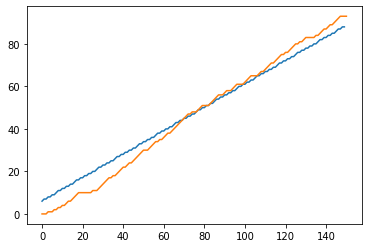

In [96]:
M = 150
r = 30
s_w = .6
s_w_a = .6
T, n, z_b = BRAVO_R2_hist(s_w, s_w_a, alpha, r, M)

x = np.arange(0, M, 1)
y = bravo_kmin(10000, math.floor(s_w * 10000), .1, x)

plt.plot(x, y, z_b)
print(n)

[Athena vs R-Bravo](https://cs.pwr.edu.pl/zagorski/rla/)